In [1]:
import torch
import numpy as np
import helper
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn
from torch import optim
import helper
import torch.nn.functional as F

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [3]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [4]:
model = Classifier()

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 30
train_losses = []
validation_losses = []

for e in range(epochs):
    running_loss = 0
    validation_loss = 0
    accuracy = 0
    
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        #Forward pass
        log_ps = model.forward(images)
        #Compute loss
        loss = criterion(log_ps, labels)
        running_loss += loss
        #Compute gradient
        loss.backward()
        #Update weights using gradient
        optimizer.step()
    
    
    
    with torch.no_grad():
        model.eval() #Turn off dropout
        for images, labels in testloader:
            log_ps = model.forward(images)
            validation_loss += criterion(log_ps, labels)
    
            ps = torch.exp(log_ps)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor))
    
    model.train() #Turn on dropout
            
    train_losses.append(running_loss/len(trainloader))
    validation_losses.append(validation_loss/len(testloader))
    print('---EPOCH {}/{}---'.format(e+1, epochs))
    print('Train loss = ',running_loss/len(trainloader))
    print('Validation loss = ',validation_loss/len(testloader))
    print('Accuracy = ', accuracy/len(testloader))

---EPOCH 1/30---
Train loss =  tensor(1.7020, grad_fn=<DivBackward0>)
Validation loss =  tensor(0.7317)
Accuracy =  tensor(0.7987)
---EPOCH 2/30---
Train loss =  tensor(0.6705, grad_fn=<DivBackward0>)
Validation loss =  tensor(0.3964)
Accuracy =  tensor(0.8871)
---EPOCH 3/30---
Train loss =  tensor(0.4683, grad_fn=<DivBackward0>)
Validation loss =  tensor(0.3102)
Accuracy =  tensor(0.9094)
---EPOCH 4/30---
Train loss =  tensor(0.3865, grad_fn=<DivBackward0>)
Validation loss =  tensor(0.2619)
Accuracy =  tensor(0.9237)
---EPOCH 5/30---
Train loss =  tensor(0.3310, grad_fn=<DivBackward0>)
Validation loss =  tensor(0.2298)
Accuracy =  tensor(0.9318)
---EPOCH 6/30---
Train loss =  tensor(0.2943, grad_fn=<DivBackward0>)
Validation loss =  tensor(0.2045)
Accuracy =  tensor(0.9389)
---EPOCH 7/30---
Train loss =  tensor(0.2608, grad_fn=<DivBackward0>)
Validation loss =  tensor(0.1802)
Accuracy =  tensor(0.9464)
---EPOCH 8/30---
Train loss =  tensor(0.2363, grad_fn=<DivBackward0>)
Validation lo

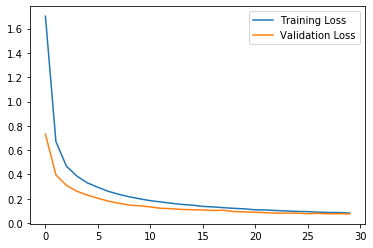

In [5]:
#Plot losses on a graph
plt.plot(train_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.legend()